# Versuch einen Decision Tree für Klassifizierung von Bildern zu verwenden

## Vorbemerkung

**Ein Problem, welches wir während dieser Arbeit festellen konnten ist, dass der DecisionTreeClassifier nicht deterministisch arbeitet. Aus diesem Grund kam es in manchen Sitationen dazu, dass die alle 3 Klassen zunächst richtig erkannt wurden. Bei einem erneuten Durchlauf dieses Notebooks wurden sie jedoch nicht mehr erkannt. Aus diesem Grund haben wir den Parameter "random_state" festgelegt.**


## Imports

Bitte installieren Sie zuvor Python-OpenCV (am besten mit PIP, da Anaconda gerne fehlschlägt).

[Anleitung](http://web.cecs.pdx.edu/~fliu/courses/cs410/python-opencv.html) --> im Conda Env ausführen

Zudem sollte das [FACD_Dataset](https://wtwilsonsun.github.io/FACD/) heruntergeladen und entpackt sein.

In [1]:
from sklearn import tree
import cv2 
import os
import glob
import numpy as np

random_state = 42

## Test mit zwei Klassen
### Laden und Formatieren der Bilder
Zum Trainieren des DecisionTrees wird ein Auszu des gesamten FACD-Datensatzes verwendet. 
Hierzu werden 32 Originalbilder und die dazugehörigen Bilder des Filters "Amaro" verwendet.
Zum Trainieren werden alle Bilder auf ein Format von 244 x 244 gebracht und anschließend in einen 1D-Vector gebracht.

In [2]:
img_dir_amaro = "filter_decision_tree/amaro"
img_dir_origin = "filter_decision_tree/original"
data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
data_origin = []
data_amaro = []

shape = (244,244)

for f1 in files_origin:
    origin = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:   
    amaro = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())
    


### Erstellen des DecisionTrees

In [3]:
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 

X = np.concatenate((data_amaro, data_origin))
print(X.shape)
y = ["amaro" for i in range(32)] + ["origin" for i in range(32)]

clf = tree.DecisionTreeClassifier(random_state=random_state)
clf.fit(X, y) 

(64, 59536)


DecisionTreeClassifier(random_state=42)

### Anzeige des Trees

[Text(167.4, 163.07999999999998, 'X[21957] <= 2.5\ngini = 0.5\nsamples = 64\nvalue = [32, 32]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]')]

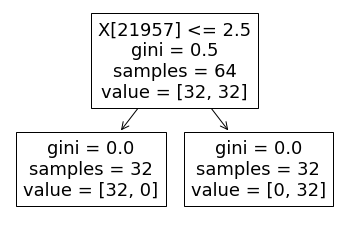

In [4]:
tree.plot_tree(clf)

### Laden von Testbildern
Zum Testen wird ein original Bild und das passende gefilterte Bild verwendet, welches nicht zu den Trainingsdaten gehört.

In [5]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg", cv2.IMREAD_GRAYSCALE)
amaro = cv2.resize(amaro, shape)
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg", cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, shape)
original = original.flatten()

print("Prediction for amaro picture:", clf.predict([amaro]))
print("Prediction for origin picture:", clf.predict([original]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']


Das Ergebnis für dieser Erkennung sieht zunächst gut aus. 
Die zwei Testbilder werden der richtigen Klasse zugeordnet. 
Nun soll es mit drei Klassen probiert werden, da die "gefilterten"-Bilder immer einen schwarzen Rand besitzen und hierdurch eine Zuordnung erfolgen könnte.

## Test mit einer dritten Klasse
### Hinzufügen einer dritten Klasse

In [6]:
img_dir_lofi = "filter_decision_tree/lofi"
data_path_lofi = os.path.join(img_dir_lofi,'*g')
files_lofi = glob.glob(data_path_lofi)
data_lofi = []

for f1 in files_lofi:
    lofi = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 

### Erstellen des DecisionTrees

[Text(186.0, 195.696, 'X[47338] <= 2.0\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32]'),
 Text(148.8, 152.208, 'X[44117] <= 88.0\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0]'),
 Text(74.4, 108.72, 'X[52841] <= 143.0\ngini = 0.285\nsamples = 29\nvalue = [5, 24, 0]'),
 Text(37.2, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(111.60000000000001, 65.232, 'X[24904] <= 15.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(148.8, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(223.20000000000002, 108.72, 'X[19310] <= 20.0\ngini = 0.353\nsamples = 35\nvalue = [27, 8, 0]'),
 Text(186.0, 65.232, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(260.40000000000003, 65.232, 'X[34627] <= 36.0\ngini = 0.18\nsamples = 30\nvalue = [27, 3, 0]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(297.6, 21.744, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),

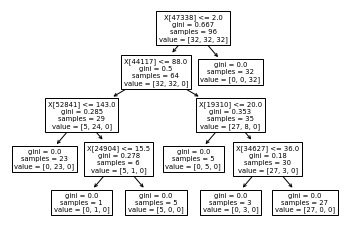

In [7]:
data_lofi = np.array(data_lofi)

X_new = np.concatenate((data_amaro, data_origin, data_lofi))
y_new = ["amaro" for i in range(32)] + ["origin" for i in range(32)] + ["lofi" for i in range(32)]

clf_new = tree.DecisionTreeClassifier(random_state=random_state)
clf_new.fit(X_new, y_new) 
tree.plot_tree(clf_new)

### Prediction des neuen Trees

In [8]:
lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg", cv2.IMREAD_GRAYSCALE)
lofi = cv2.resize(lofi, shape)
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_new.predict([amaro]))
print("Prediction for origin picture:", clf_new.predict([original]))
print("Prediction for lofi picture:", clf_new.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['amaro']


Wie zu sehen ist, klappt die Klassifikation in diesem Fall nicht mehr. :(

Als nächstes probieren wir es mit mehr Testdaten aus.

## Test mit allen FACD-Daten der ausgewählten Klassen

In [9]:
img_dir_amaro = "FACD_image/Amaro"
img_dir_origin = "FACD_image/Original"
img_dir_origin = "FACD_image/Lofi"

data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

test_image= "601122" #ignore this picture during fit phase

for f1 in files_origin:
    if test_image in f1:
        continue
    origin = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    if test_image in f1:
        continue
    amaro = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    if test_image in f1:
        continue
    lofi = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 

(2590, 59536)


[Text(139.60425163977683, 212.91, 'X[56974] <= 10.5\ngini = 0.512\nsamples = 2590\nvalue = [1279, 32, 1279]'),
 Text(16.154402895054282, 203.85, 'X[35180] <= 223.0\ngini = 0.113\nsamples = 354\nvalue = [16, 5, 333]'),
 Text(12.923522316043426, 194.79, 'X[21068] <= 12.0\ngini = 0.083\nsamples = 348\nvalue = [10, 5, 333]'),
 Text(6.461761158021713, 185.73, 'X[10403] <= 9.5\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1]'),
 Text(3.2308805790108566, 176.67, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(9.69264173703257, 176.67, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(19.38528347406514, 185.73, 'X[14753] <= 227.0\ngini = 0.063\nsamples = 343\nvalue = [6, 5, 332]'),
 Text(16.154402895054282, 176.67, 'X[56484] <= 175.0\ngini = 0.046\nsamples = 340\nvalue = [3, 5, 332]'),
 Text(12.923522316043426, 167.60999999999999, 'X[30428] <= 11.5\ngini = 0.035\nsamples = 338\nvalue = [1, 5, 332]'),
 Text(9.69264173703257, 158.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(16.15

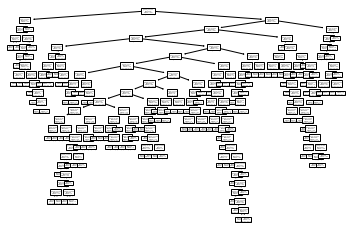

In [10]:
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_full = np.concatenate((data_amaro, data_origin,data_lofi))
print(X_full.shape)

y_full = ["amaro" for i in range(data_amaro.shape[0])] 
y_full += ["origin" for i in range(data_origin.shape[0])] 
y_full += ["lofi" for i in range(data_lofi.shape[0])]

clf_full = tree.DecisionTreeClassifier(random_state=random_state)
clf_full.fit(X_full, y_full) 
tree.plot_tree(clf_full)

In [11]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg", cv2.IMREAD_GRAYSCALE)
amaro = cv2.resize(amaro, shape)
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg", cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, shape)
original = original.flatten()

lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg", cv2.IMREAD_GRAYSCALE)
lofi = cv2.resize(lofi, shape)
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_full.predict([amaro]))
print("Prediction for origin picture:", clf_full.predict([original]))
print("Prediction for lofi picture:", clf_full.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['origin']


Wie zu sehen ist, wird der Entscheidungsbaum immer größer und komplexer. 
Leider haben die zusätzlichen Daten keine korrekte vorhersage gebracht. 

Da der Entscheidungsbaum sehr groß ist, könnte Overfitting das Problem sein. Deshalb wird als nächstes die max_depth festgelegt.

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['origin']


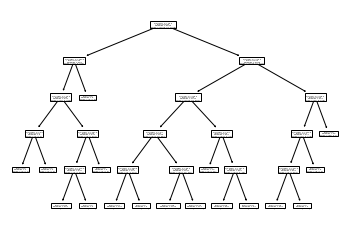

In [12]:
clf_full_depth = tree.DecisionTreeClassifier(random_state=random_state, max_depth=5)
clf_full_depth.fit(X_full, y_full) 
tree.plot_tree(clf_full_depth)

print("Prediction for amaro picture:", clf_full_depth.predict([amaro]))
print("Prediction for origin picture:", clf_full_depth.predict([original]))
print("Prediction for lofi picture:", clf_full_depth.predict([lofi]))

Wie zu sehen ist, wird das Testbild immernoch falsch klassifiziert.

## Test mit Farbbildern
Im letzten Schritt soll nun probiert werden, ob eine Verbesserung mit RGB-Bildern erzielt werden kann.
Um den Trainingsvorgang zu beschleunigen werden wieder die ursprünglichen Trainingsbilder benutzt.

### Erstellen des Modells

(96, 178608)


[Text(200.88000000000002, 195.696, 'X[78319] <= 2.0\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32]'),
 Text(133.92000000000002, 152.208, 'X[97374] <= 29.5\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0]'),
 Text(200.88000000000002, 108.72, 'X[165534] <= 105.5\ngini = 0.381\nsamples = 43\nvalue = [32, 11, 0]'),
 Text(133.92000000000002, 65.232, 'X[170318] <= 11.0\ngini = 0.157\nsamples = 35\nvalue = [32, 3, 0]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(267.84000000000003, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(267.84000000000003, 152.208, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

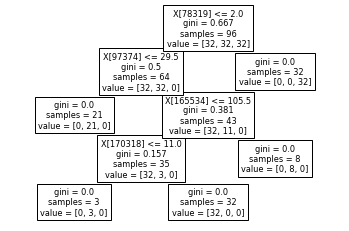

In [13]:
img_dir_amaro = "filter_decision_tree/amaro"
img_dir_origin = "filter_decision_tree/original"
img_dir_lofi = "filter_decision_tree/lofi"

data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

for f1 in files_origin:
    origin = cv2.imread(f1)
    origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    amaro = cv2.imread(f1)
    amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    lofi = cv2.imread(f1)
    lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 
    
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_color = np.concatenate((data_amaro, data_origin, data_lofi))
print(X_color.shape)

y_color = ["amaro" for i in range(data_amaro.shape[0])] 
y_color += ["origin" for i in range(data_origin.shape[0])] 
y_color += ["lofi" for i in range(data_lofi.shape[0])]

clf_color = tree.DecisionTreeClassifier(random_state=random_state)
clf_color.fit(X_color, y_color) 
tree.plot_tree(clf_color)

### Prediction

In [14]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg")
amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
amaro = cv2.resize(amaro, shape)
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = cv2.resize(original, shape)
original = original.flatten()

lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg")
lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
lofi = cv2.resize(lofi, shape)
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_color.predict([amaro]))
print("Prediction for origin picture:", clf_color.predict([original]))
print("Prediction for lofi picture:", clf_color.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['amaro']


Wie zu sehen ist, gibt es auch bei den farbigen Bildern keine Verbesserung.

## Reduzierung der Features
Die nächste Verbesserung, die in diesem Notebook getestet werden soll, ist die Reduzierung der Features. 
Demzufolge werden die Bilder weiter verkleinert.

(96, 44652)


[Text(200.88000000000002, 195.696, 'X[289] <= 0.5\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32]'),
 Text(133.92000000000002, 152.208, 'X[18683] <= 17.5\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [0, 20, 0]'),
 Text(200.88000000000002, 108.72, 'X[43212] <= 97.5\ngini = 0.397\nsamples = 44\nvalue = [32, 12, 0]'),
 Text(133.92000000000002, 65.232, 'X[41490] <= 28.0\ngini = 0.198\nsamples = 36\nvalue = [32, 4, 0]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(267.84000000000003, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(267.84000000000003, 152.208, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

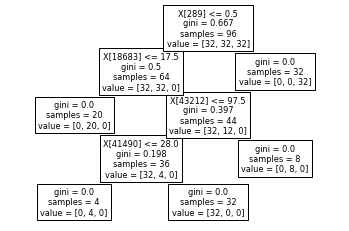

In [15]:
img_dir_amaro = "filter_decision_tree/amaro"
img_dir_origin = "filter_decision_tree/original"
img_dir_lofi = "filter_decision_tree/lofi"

data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

# Reduzierung der Features
shape = (122,122)

for f1 in files_origin:
    origin = cv2.imread(f1)
    origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    amaro = cv2.imread(f1)
    amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    lofi = cv2.imread(f1)
    lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 
    
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_reduced = np.concatenate((data_amaro, data_origin,data_lofi))
print(X_reduced.shape)

y_reduced = ["amaro" for i in range(data_amaro.shape[0])] 
y_reduced += ["origin" for i in range(data_origin.shape[0])] 
y_reduced += ["lofi" for i in range(data_lofi.shape[0])]

clf_reduced = tree.DecisionTreeClassifier(random_state=random_state)
clf_reduced.fit(X_reduced, y_reduced) 
tree.plot_tree(clf_reduced)

In [16]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg")
amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
amaro = cv2.resize(amaro, shape)
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = cv2.resize(original, shape)
original = original.flatten()

lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg")
lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
lofi = cv2.resize(lofi, shape)
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_reduced.predict([amaro]))
print("Prediction for origin picture:", clf_reduced.predict([original]))
print("Prediction for lofi picture:", clf_reduced.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['amaro']


Wie zu sehen ist, funktioniert nun die Klassifizierung immer noch nicht. 

## Test mit Parameteranpassung

Nun beginnen wir die die Parameter beim Erstellen der Decision Trees dynamisch anzupassen. Hierzu verwenden wir zunächst das reduzierte Dataset mit Farbbildern.

Zunächst erstellen wir uns eine Hilfsmethode.

In [17]:
shape=(244,244)

amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg")
amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
amaro = cv2.resize(amaro, shape)
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = cv2.resize(original, shape)
original = original.flatten()

lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg")
lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
lofi = cv2.resize(lofi, shape)
lofi = lofi.flatten()

working_trees = []

def build_and_plot_tree(X, y, working_trees, criterion = 'gini', splitter = 'best', 
                        max_depth = None, max_features = None):
    
    clf_dynamic = tree.DecisionTreeClassifier(random_state = random_state, criterion=criterion, splitter=splitter,
                                              max_depth = max_depth, max_features=max_features)
    clf_dynamic.fit(X, y) 
    tree.plot_tree(clf_dynamic)
    print("Decision tree for parameters:")
    print("criterion:", criterion)
    print("splitter:", splitter)
    print("max_depth:", max_depth)
    print("max_features:", max_features)
    
    amaro_pred = clf_dynamic.predict([amaro])[0]
    original_pred = clf_dynamic.predict([original])[0]
    lofi_pred = clf_dynamic.predict([lofi])[0]
    print("__________________________________________________")
    print("Prediction for amaro picture:", amaro_pred)
    print("Prediction for origin picture:", original_pred)
    print("Prediction for lofi picture:", lofi_pred)
    if amaro_pred == 'amaro' and original_pred == 'origin' and lofi_pred == 'lofi':
        print("###########################################")
        print("Diese Klassifikation hat gut funktioniert!")
        print("###########################################")
        working_trees.append(clf_dynamic)

Wir wollen nicht alle möglichen Parameter ausprobieren, da dies nicht zielführend ist.
Zum Testen haben wir uns die nachfolgenden Parameter herausgesucht:

- criterion &rightarrow; {“gini”, “entropy”}
- splitter &rightarrow; {“best”, “random”}
- max_depth &rightarrow; int
- max_features &rightarrow; {“auto”, “sqrt”, “log2”}

Zunächst probieren wir noch einmal den Standardtree:

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: None
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


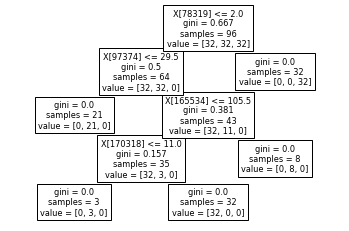

In [18]:
build_and_plot_tree(X_color, y_color, working_trees)

Wie wir bereits wussten, funktioniert dieser nicht besonders gut.

Als nächstes ändern wir die Criterion von Gini auf Entropie:

Decision tree for parameters:
criterion: entropy
splitter: best
max_depth: None
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


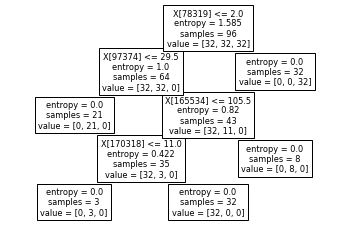

In [19]:
build_and_plot_tree(X_color, y_color, working_trees, criterion = 'entropy')

Die hat leider keiner Verbesserung gebracht.

Als nächstes tauschen wir den Splitter aus. Hierbei wird "random" gewählt, um zufällig einen Splitt eines Knotens durchzuführen.

Decision tree for parameters:
criterion: gini
splitter: random
max_depth: None
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: lofi
###########################################
Diese Klassifikation hat gut funktioniert!
###########################################


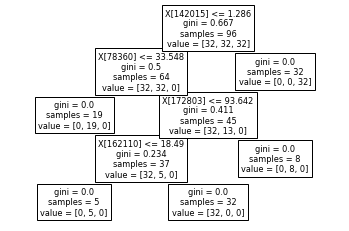

In [20]:
build_and_plot_tree(X_color, y_color, working_trees, splitter = 'random')

Diese Änderung hat dazu geführt, dass die Klassifikation funktioniert hat.

Als nächstes probieren wir, was passiert, wenn wir die max_depth ändern.

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: 1
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


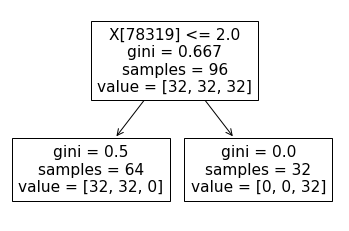

In [21]:
build_and_plot_tree(X_color, y_color, working_trees, max_depth=1)

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: 2
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


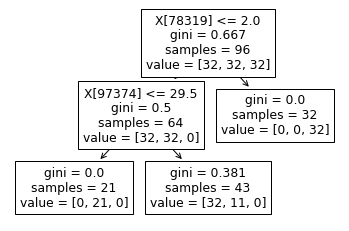

In [22]:
build_and_plot_tree(X_color, y_color, working_trees, max_depth=2)

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: 3
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


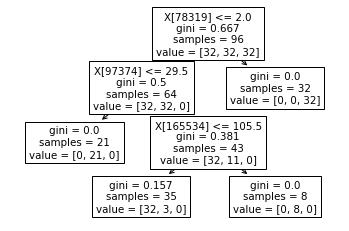

In [23]:
build_and_plot_tree(X_color, y_color, working_trees, max_depth=3)

Leider kann mit geringeren Tiefeeinstellungen keine Klassifikation erreicht werden.

Nun stellt sich jedoch die Frage, ob dies auch den erfolgreichen Durchlauf bei Verwendung eines Random-Splitters der Fall ist?

Decision tree for parameters:
criterion: gini
splitter: random
max_depth: 3
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


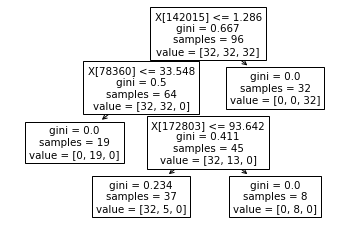

In [24]:
build_and_plot_tree(X_color, y_color, working_trees, max_depth=3, splitter='random')

Wie zu sehen ist, ist eine korrekte Klassifikation bei der zuvor erfolgreichen Variante, jedoch mit geringerer Tiefe nicht möglich.

Als nächstes Probieren wir aus, was passiert, wenn wir die Criterion zu Entropy ändern.

Decision tree for parameters:
criterion: entropy
splitter: best
max_depth: 3
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


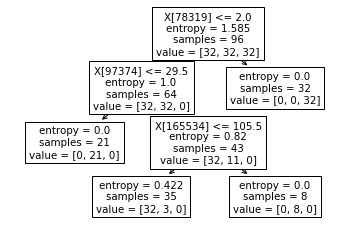

In [25]:
build_and_plot_tree(X_color, y_color, working_trees, max_depth=3, criterion='entropy')

Leider hat dies auch nichts geändert. Evtl. klappt es ja mit dem zusätzlichen Random-Split?

Decision tree for parameters:
criterion: entropy
splitter: random
max_depth: 3
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


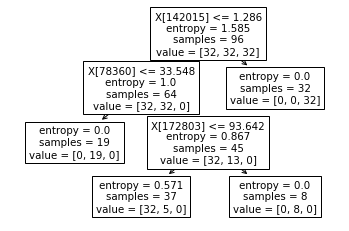

In [26]:
build_and_plot_tree(X_color, y_color, working_trees, criterion='entropy', splitter="random", max_depth=3)

Nun soll festgestellt werden, ob das Problem tatsächlich die Tiefe-Restriktion darstellt.

Decision tree for parameters:
criterion: entropy
splitter: random
max_depth: None
max_features: None
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: lofi
###########################################
Diese Klassifikation hat gut funktioniert!
###########################################


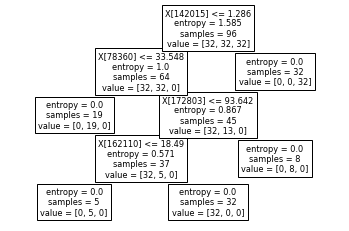

In [27]:
build_and_plot_tree(X_color, y_color, working_trees, criterion='entropy', splitter="random")

Anscheinend liegt das Problem wirklich an der Tiefe des Modells.

Nun sollen die max_features durchprobiert werden.

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: None
max_features: auto
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: lofi
###########################################
Diese Klassifikation hat gut funktioniert!
###########################################


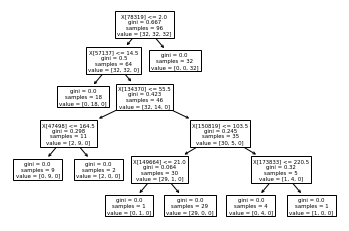

In [28]:
build_and_plot_tree(X_color, y_color, working_trees, max_features="auto")

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: None
max_features: sqrt
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: lofi
###########################################
Diese Klassifikation hat gut funktioniert!
###########################################


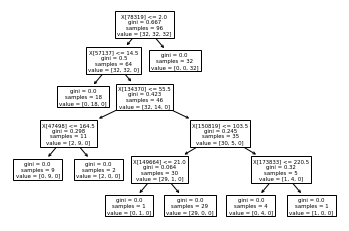

In [29]:
build_and_plot_tree(X_color, y_color, working_trees, max_features="sqrt")

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: 3
max_features: sqrt
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: lofi
###########################################
Diese Klassifikation hat gut funktioniert!
###########################################


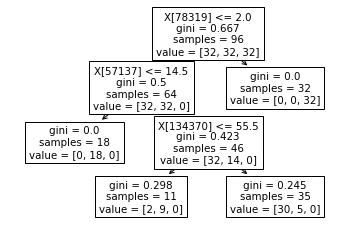

In [30]:
build_and_plot_tree(X_color, y_color, working_trees, max_features="sqrt", max_depth=3)

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: 2
max_features: sqrt
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


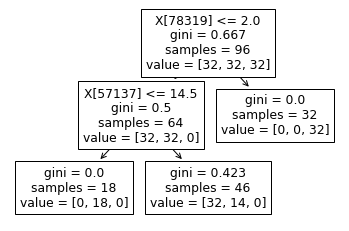

In [31]:
build_and_plot_tree(X_color, y_color, working_trees, max_features="sqrt", max_depth=2)

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: None
max_features: log2
__________________________________________________
Prediction for amaro picture: lofi
Prediction for origin picture: origin
Prediction for lofi picture: lofi


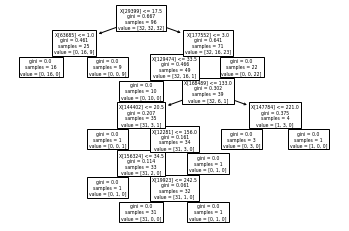

In [32]:
build_and_plot_tree(X_color, y_color, working_trees, max_features="log2")

Decision tree for parameters:
criterion: gini
splitter: best
max_depth: 5
max_features: log2
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


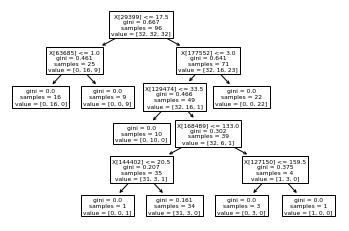

In [33]:
build_and_plot_tree(X_color, y_color, working_trees, max_features="log2", max_depth=5)

Decision tree for parameters:
criterion: entropy
splitter: best
max_depth: 5
max_features: log2
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


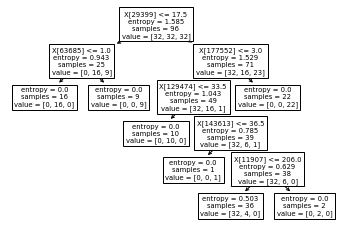

In [34]:
build_and_plot_tree(X_color, y_color, working_trees, max_features="log2", max_depth=5, criterion="entropy")

Decision tree for parameters:
criterion: entropy
splitter: random
max_depth: 5
max_features: log2
__________________________________________________
Prediction for amaro picture: amaro
Prediction for origin picture: origin
Prediction for lofi picture: amaro


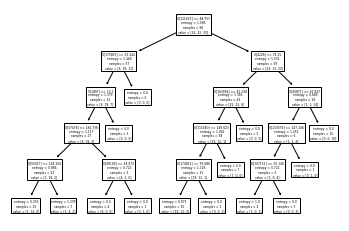

In [35]:
build_and_plot_tree(X_color, y_color, working_trees, max_features="log2",  max_depth=5, criterion="entropy", splitter="random")

Interessanter weise funktioniert die Klassifikation mit "max_features = auto" und "max_features = sqrt", jedoch nicht mit "max_features = log2".
Bei "sqrt" ist es sogar möglich, die Tiefe des Modells zu reduzieren, ohne eine Fehlklassifikation zu erleiden.

### Testen der funktionierenden Entscheidungsbäume

Nun sollen die funktionierenden Trees mit mehr Bildern (10 pro Klasse gestet werden, die aus dem FACD-Dataset geladen werden.

In [36]:
img_dir_amaro = "filter_decision_tree/test_data/amaro"
img_dir_origin = "filter_decision_tree/test_data/origin"
img_dir_lofi = "filter_decision_tree/test_data/lofi"

data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

test_origin = []
test_amaro = []
test_lofi = []

shape=(244,244)

for f1 in files_origin:
    origin = cv2.imread(f1)
    origin = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    origin = cv2.resize(origin, shape)
    test_origin.append(origin.flatten()) 
     
for f2 in files_amaro:  
    amaro = cv2.imread(f2)
    amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
    amaro = cv2.resize(amaro, shape)
    test_amaro.append(amaro.flatten())

for f3 in files_lofi:
    lofi = cv2.imread(f3)
    lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
    lofi = cv2.resize(lofi, shape)
    test_lofi.append(lofi.flatten()) 

test_origin = np.array(test_origin)
test_amaro = np.array(test_amaro)
test_lofi = np.array(test_lofi)

y_test_origin = ["origin" for i in range(len(test_origin))] 
y_test_amaro = ["amaro" for i in range(len(test_amaro))] 
y_test_lofi = ["lofi" for i in range(len(test_lofi))]

In [37]:
for t in working_trees:
    print(t.get_params())
    print("Score of origin prediction:", t.score(test_origin, y_test_origin))
    print("Score of amaro prediction:", t.score(test_amaro, y_test_amaro))
    print("Score of lofi prediction:", t.score(test_lofi, y_test_lofi))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'random'}
Score of origin prediction: 1.0
Score of amaro prediction: 0.75
Score of lofi prediction: 0.8125
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'random'}
Score of origin prediction: 1.0
Score of amaro prediction: 0.75
Score of lofi prediction: 0.8125
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impur

Wie zu sehen ist, funktioniert der DecisionTree in diesem Fall (und bei den gegeben Trees) am besten, wenn der max_feature Parameter auf "auto" oder auf "sqrt" gesetzt ist.

Unerwartet auffällig ist jedoch, dass die Origin Bilder stets korrekt klassifiziert sind. Dies könnte am Overfitting des Merkmals "Schwarzer Rand" liegen, da alle Filter bilder diesen besitzen.

## Cross Validation des FACD-Datasets

Aus gewonnen Erfahrungen wollen wir nun noch einmal mit einer Cross-Validation probieren, ob wir eine gute Klassifizierung erreichen können.

In [38]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

img_dir_amaro = "FACD_image/Amaro"
img_dir_origin = "FACD_image/Origin"
img_dir_lofi = "FACD_image/Lofi"
shape = (244,244)
random_state = 42


data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

for f1 in files_origin:
    origin = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    origin = cv2.resize(origin, shape)
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    amaro = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    amaro = cv2.resize(amaro, shape)
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    lofi = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    lofi = cv2.resize(lofi, shape)
    data_lofi.append(lofi.flatten()) 
    
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_full = np.concatenate((data_amaro, data_origin, data_lofi))
y_full = ["amaro" for i in range(data_amaro.shape[0])] 
y_full += ["origin" for i in range(data_origin.shape[0])] 
y_full += ["lofi" for i in range(data_lofi.shape[0])]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

classifier = tree.DecisionTreeClassifier(random_state=random_state, splitter="random", max_features="auto")
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_features='auto', random_state=42, splitter='random')

In [41]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(classifier, X_full, y_full, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
y_pred = classifier.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

Accuracy: 0.823 (0.024)
              precision    recall  f1-score   support

       amaro       0.77      0.78      0.78       266
        lofi       0.78      0.73      0.75       257
      origin       0.91      0.96      0.94       245

    accuracy                           0.82       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.82      0.82      0.82       768

